## Load Libraries & Data

In [2]:
import pandas as pd   # data processing and manipulation
import numpy as np   # liner algebra 
import matplotlib.pyplot as plt   # visualization
import seaborn as sns   # visualization
import statistics
import warnings 

warnings.filterwarnings('ignore')

In [3]:
sample = pd.read_csv("sample_sub.csv")
test = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")
dictionary = pd.read_csv("train_data_dictionary.csv")

In [4]:
train.head(5)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
dictionary

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


## Data Cleaning & Optimization

In [7]:
train.isna().sum() # Checking Null Value

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
# Fill those null value with each column's mode
train['Bed Grade'].fillna(statistics.mode(train['Bed Grade']),inplace=True)
train['City_Code_Patient'].fillna(statistics.mode(train['City_Code_Patient']),inplace=True)

In [9]:
# Find unique values for each column
for features in train.columns:
    print('Unique Values for {}'.format(features))
    print(train[features].unique())
    print('---------------------------')
    print()

Unique Values for case_id
[     1      2      3 ... 318436 318437 318438]
---------------------------

Unique Values for Hospital_code
[ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
---------------------------

Unique Values for Hospital_type_code
['c' 'e' 'b' 'a' 'f' 'd' 'g']
---------------------------

Unique Values for City_Code_Hospital
[ 3  5  1  2  6  9 10  4 11  7 13]
---------------------------

Unique Values for Hospital_region_code
['Z' 'X' 'Y']
---------------------------

Unique Values for Available Extra Rooms in Hospital
[ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
---------------------------

Unique Values for Department
['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
---------------------------

Unique Values for Ward_Type
['R' 'S' 'Q' 'P' 'T' 'U']
---------------------------

Unique Values for Ward_Facility_Code
['F' 'E' 'D' 'B' 'A' 'C']
---------------------------

Unique Values 

###### As we can see:
- Hospital_region_code
- Department
- Ward_Type
- Type of Admission
- Severity of Illness

Can be convert into category data type to optimize our datasets

In [10]:
# Drop unecessary columns
train = train.drop(['case_id','patientid','Hospital_region_code','Bed Grade'], axis = 1)
test = test.drop(['case_id','patientid','Hospital_region_code','Bed Grade'], axis = 1)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   City_Code_Patient                  318438 non-null  float64
 8   Type of Admission                  318438 non-null  object 
 9   Severity of Illness                318438 non-null  object 
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

## Exploratory Data Analysis

In [12]:
# We divide the columns into categorical and numerical for Exploratory Data Analysis (EDA)
cat_cols = []
num_cols = []

for col in train.columns:
    if train[col].dtypes == 'object':
        cat_cols.append(col)
        
for col in train.columns:
    if train[col].dtypes != 'object':
        num_cols.append(col)
        
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


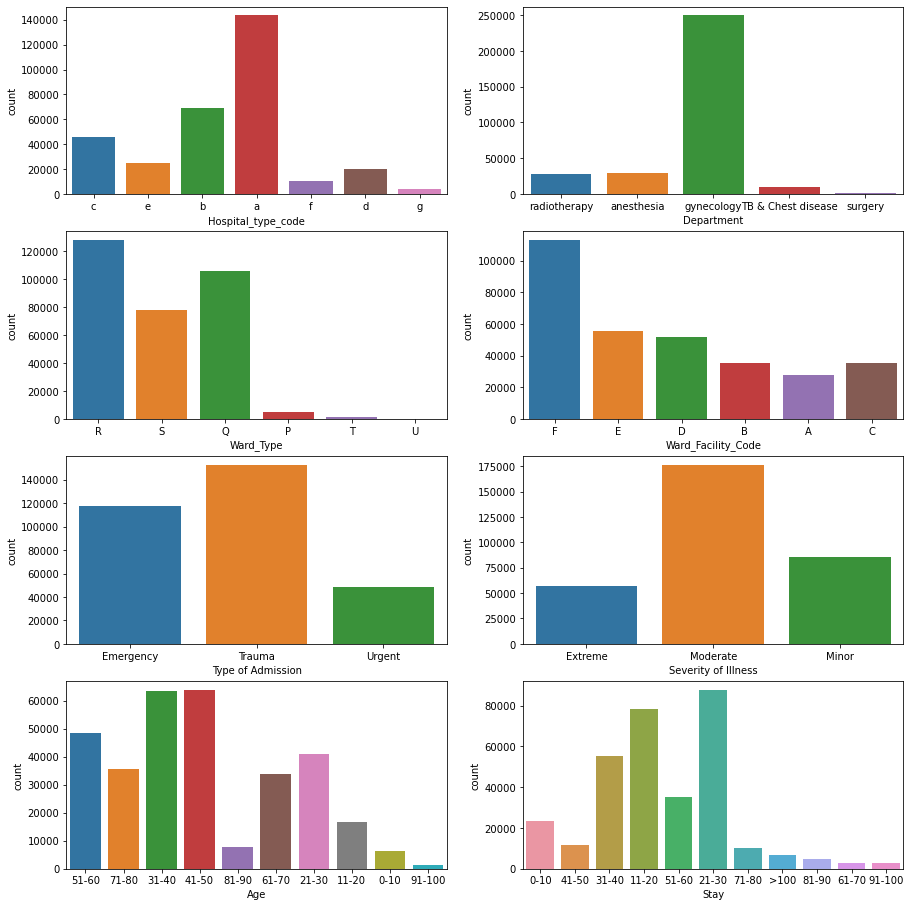

In [15]:
i = 1
plt.figure(figsize = (15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(train[col])
    i=i+1
plt.show()

In [17]:
train['Stay'].value_counts()

21-30     87491
11-20     78139
31-40     55159
51-60     35018
0-10      23604
41-50     11743
71-80     10254
>100       6683
81-90      4838
91-100     2765
61-70      2744
Name: Stay, dtype: int64

In [18]:
train['Stay'].replace('More than 100 Days', '>100', inplace=True)

## Data Processing 

In [19]:
# Divide the Length of stay into 2 categories  0: 0-10 days     1: 10-100+ days

In [20]:
train['Stay']= train['Stay'].replace({'0-10':0, '11-20':0, '21-30':1, '31-40':1, '41-50':1, '51-60':2,'61-70':2,'71-80':2,'81-90':2,'91-100':2,'>100':2})

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   City_Code_Patient                  318438 non-null  float64
 8   Type of Admission                  318438 non-null  object 
 9   Severity of Illness                318438 non-null  object 
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [22]:
train["Stay"].value_counts()

1    154393
0    101743
2     62302
Name: Stay, dtype: int64

In [23]:
train['Stay'] = train['Stay'].astype('int32')

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   City_Code_Patient                  318438 non-null  float64
 8   Type of Admission                  318438 non-null  object 
 9   Severity of Illness                318438 non-null  object 
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

In [25]:
train[cat_cols].head()

,Hospital_type_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
0,c,radiotherapy,R,F,Emergency,Extreme,51-60,0
1,c,radiotherapy,S,F,Trauma,Extreme,51-60,1
2,e,anesthesia,S,E,Trauma,Extreme,51-60,1
3,b,radiotherapy,R,D,Trauma,Extreme,51-60,1
4,b,radiotherapy,S,D,Trauma,Extreme,51-60,1


In [26]:
train[num_cols].head()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,City_Code_Patient,Visitors with Patient,Admission_Deposit
0,8,3,3,7.0,2,4911.0
1,2,5,2,7.0,2,5954.0
2,10,1,2,7.0,2,4745.0
3,26,2,2,7.0,2,7272.0
4,26,2,2,7.0,2,5558.0


In [27]:
#Encoding Categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols.append('Hospital_code')
cat_cols.append('City_Code_Hospital')
cat_cols.append('City_Code_Patient')
num_cols.remove('Hospital_code')
num_cols.remove('City_Code_Hospital')
num_cols.remove('City_Code_Patient')

for col in cat_cols:
    train[col] = le.fit_transform(train[col])

In [28]:
print([cat_cols])
print([num_cols])

[['Hospital_type_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay', 'Hospital_code', 'City_Code_Hospital', 'City_Code_Patient']]
[['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']]


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int32  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  int32  
 5   Ward_Type                          318438 non-null  int32  
 6   Ward_Facility_Code                 318438 non-null  int32  
 7   City_Code_Patient                  318438 non-null  int64  
 8   Type of Admission                  318438 non-null  int32  
 9   Severity of Illness                318438 non-null  int32  
 10  Visitors with Patient              318438 non-null  int64  
 11  Age                                3184

<AxesSubplot:>

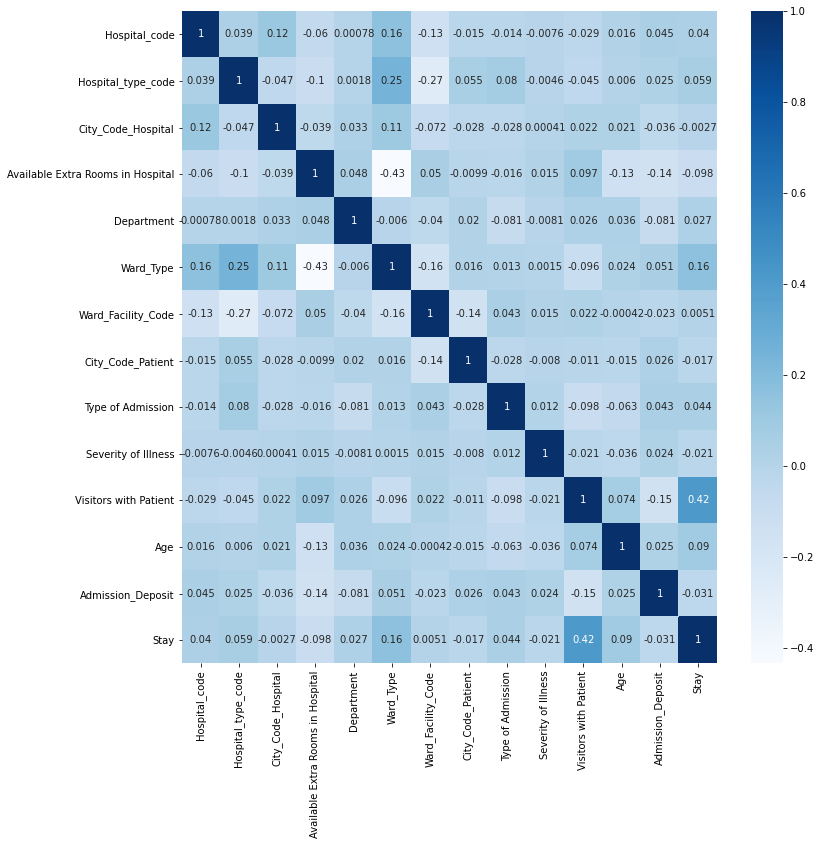

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

In [31]:
# Scaling numerical columns

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

train[num_cols] = ss.fit_transform(train[num_cols].values)

In [32]:
train

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,7,2,2,-0.169177,3,2,5,6,0,0,-0.727923,5,0.027835,0
1,1,2,4,-1.025217,3,3,5,6,1,0,-0.727923,5,0.987556,1
2,9,4,0,-1.025217,1,3,4,6,1,0,-0.727923,5,-0.124910,1
3,25,1,1,-1.025217,3,2,3,6,1,0,-0.727923,5,2.200319,1
4,25,1,1,-1.025217,3,3,3,6,1,0,-0.727923,5,0.623175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,5,0,5,-0.169177,3,1,5,21,0,2,-0.161049,4,-0.677923,0
318434,23,0,0,-1.025217,1,1,4,7,2,2,0.405826,8,1.673071,1
318435,6,0,3,-0.169177,2,2,5,9,0,1,-0.161049,7,-0.594189,0
318436,10,1,1,-0.169177,1,1,3,7,1,1,0.972701,1,-1.030342,0


In [33]:
from sklearn.model_selection import train_test_split

Y = train['Stay']
X = train.drop('Stay', axis = 1)

In [34]:
Y

0         0
1         1
2         1
3         1
4         1
         ..
318433    0
318434    1
318435    0
318436    0
318437    0
Name: Stay, Length: 318438, dtype: int64

In [35]:
X

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,7,2,2,-0.169177,3,2,5,6,0,0,-0.727923,5,0.027835
1,1,2,4,-1.025217,3,3,5,6,1,0,-0.727923,5,0.987556
2,9,4,0,-1.025217,1,3,4,6,1,0,-0.727923,5,-0.124910
3,25,1,1,-1.025217,3,2,3,6,1,0,-0.727923,5,2.200319
4,25,1,1,-1.025217,3,3,3,6,1,0,-0.727923,5,0.623175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,5,0,5,-0.169177,3,1,5,21,0,2,-0.161049,4,-0.677923
318434,23,0,0,-1.025217,1,1,4,7,2,2,0.405826,8,1.673071
318435,6,0,3,-0.169177,2,2,5,9,0,1,-0.161049,7,-0.594189
318436,10,1,1,-0.169177,1,1,3,7,1,1,0.972701,1,-1.030342


In [36]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y,test_size= 0.2, stratify=Y, random_state=42)

## Building models

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

In [38]:
X_test.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit'],
      dtype='object')

In [39]:
#Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
Y_pred = logistic_regression.predict(X_test)
acc_logistic_regression = logistic_regression.score(X_test, Y_test) * 100

In [40]:
print(acc_logistic_regression)

55.93832433111419


In [41]:
# Decision Tree Model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_test, Y_test) * 100

In [42]:
print(acc_decision_tree)

50.982916719005146


In [43]:
# Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_test, Y_test) * 100

In [44]:
print(acc_random_forest)

58.11926893606331
